In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset 
df = pd.read_csv('obesity_data_clean.csv')


In [2]:
#check for missing values 
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
gender                0
age                   0
height                0
weight                0
family_history        0
high_cal_diet         0
freq_veggie           0
amt_daily_meals       0
freq_snacking         0
smoking               0
amt_water             0
cal_monitoring        0
exercise_per_week     0
time_technology       0
freq_alcohol          0
transport             0
obesity_group         0
obesity_group_cont    0
dtype: int64


In [4]:
#check duplicate values 
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [5]:
#datatypes 
print(df.dtypes)


gender                 object
age                   float64
height                float64
weight                float64
family_history          int64
high_cal_diet           int64
freq_veggie           float64
amt_daily_meals       float64
freq_snacking           int64
smoking                 int64
amt_water             float64
cal_monitoring          int64
exercise_per_week     float64
time_technology       float64
freq_alcohol            int64
transport              object
obesity_group          object
obesity_group_cont      int64
dtype: object


In [6]:
print(df.describe())

               age       height       weight  family_history  high_cal_diet  \
count  2087.000000  2087.000000  2087.000000     2087.000000    2087.000000   
mean     24.353090     1.702674    86.858730        0.825108       0.883565   
std       6.368801     0.093186    26.190847        0.379966       0.320823   
min      14.000000     1.450000    39.000000        0.000000       0.000000   
25%      19.915937     1.630178    66.000000        1.000000       1.000000   
50%      22.847618     1.701584    83.101100        1.000000       1.000000   
75%      26.000000     1.769491   108.015907        1.000000       1.000000   
max      61.000000     1.980000   173.000000        1.000000       1.000000   

       freq_veggie  amt_daily_meals  freq_snacking      smoking    amt_water  \
count  2087.000000      2087.000000    2087.000000  2087.000000  2087.000000   
mean      2.421466         2.701179       1.146143     0.021083     2.004749   
std       0.534737         0.764614       0.4594

In [7]:
selected_features = ['age', 'gender', 'obesity_group']
df_selected = df[selected_features]

print(df_selected.head())


    age  gender        obesity_group
0  21.0  female        normal_weight
1  21.0  female        normal_weight
2  23.0    male        normal_weight
3  27.0    male   overweight_level_i
4  22.0    male  overweight_level_ii


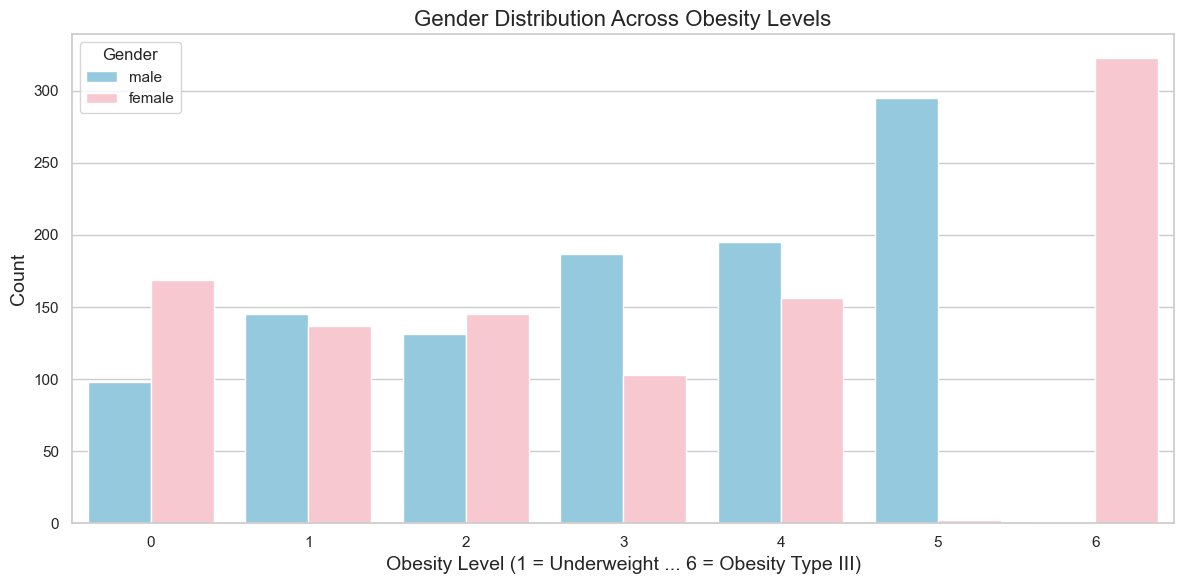

In [8]:
import seaborn as sns

#gender distribution across obesity levels shown by bar plot 
selected_features = ['gender', 'obesity_group_cont'] 
df_selected = df[selected_features]


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_selected,
    x='obesity_group_cont',
    hue='gender',
    palette={'female': 'pink', 'male': 'skyblue'}  
)

plt.title('Gender Distribution Across Obesity Levels', fontsize=16)
plt.xlabel('Obesity Level (1 = Underweight ... 6 = Obesity Type III)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

In [10]:
print(df.head())

   gender   age  height  weight  family_history  high_cal_diet  freq_veggie  \
0  female  21.0    1.62    64.0               1              0          2.0   
1  female  21.0    1.52    56.0               1              0          3.0   
2    male  23.0    1.80    77.0               1              0          2.0   
3    male  27.0    1.80    87.0               0              0          3.0   
4    male  22.0    1.78    89.8               0              0          2.0   

   amt_daily_meals  freq_snacking  smoking  amt_water  cal_monitoring  \
0              3.0              1        0        2.0               0   
1              3.0              1        1        3.0               1   
2              3.0              1        0        2.0               0   
3              3.0              1        0        2.0               0   
4              1.0              1        0        2.0               0   

   exercise_per_week  time_technology  freq_alcohol              transport  \
0       

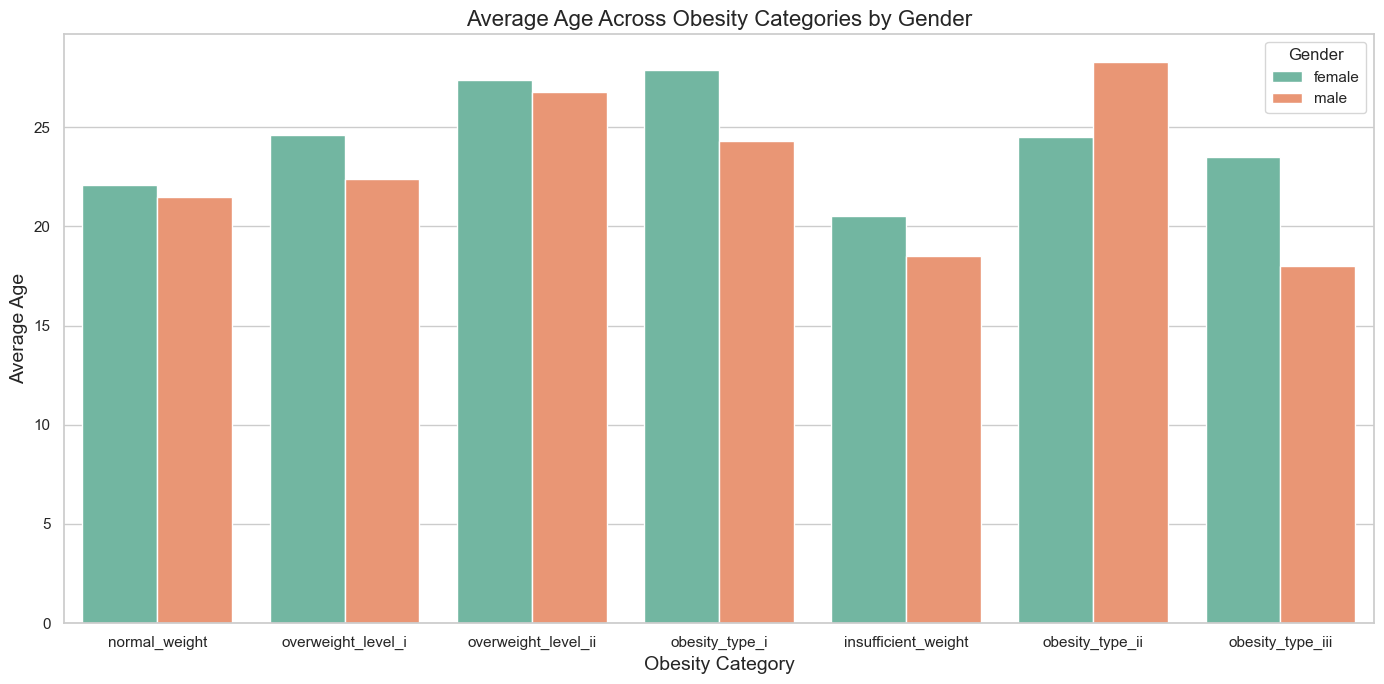

In [11]:
#age vs obesity level split by gender 
selected_features = ['age', 'gender', 'obesity_group']
df_selected = df[selected_features]

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_selected,
    x='obesity_group',
    y='age',
    hue='gender',
    errorbar=None,       
    palette='Set2'        
)

plt.title('Average Age Across Obesity Categories by Gender', fontsize=16)
plt.xlabel('Obesity Category', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()


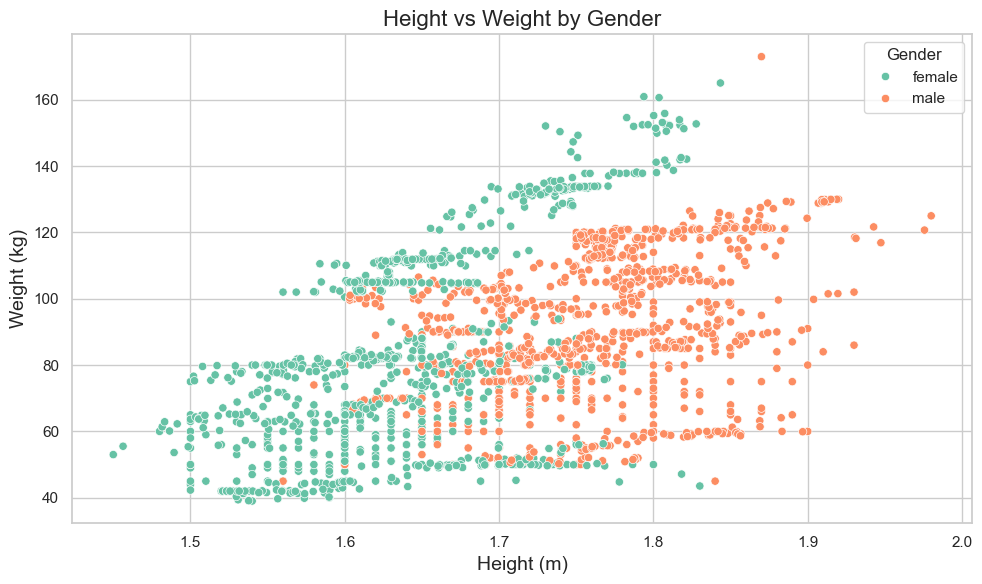

In [12]:
##scatter plot for height vs weight by gender 
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='height', y='weight', hue='gender', palette='Set2')

plt.title('Height vs Weight by Gender', fontsize=16)
plt.xlabel('Height (m)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


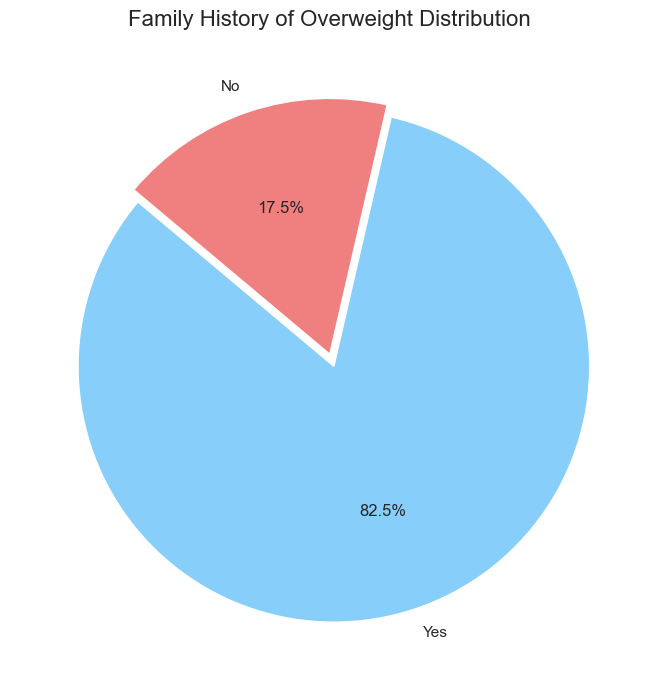

In [16]:
##pie chart for family history of overweight distribution 
family_history_counts = df['family_history'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    family_history_counts, 
    labels=family_history_counts.index.map({0: 'No', 1: 'Yes'}),  
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightskyblue', 'lightcoral'], 
    explode=(0.05, 0) 
)

plt.title('Family History of Overweight Distribution', fontsize=16)
plt.tight_layout()
plt.show()


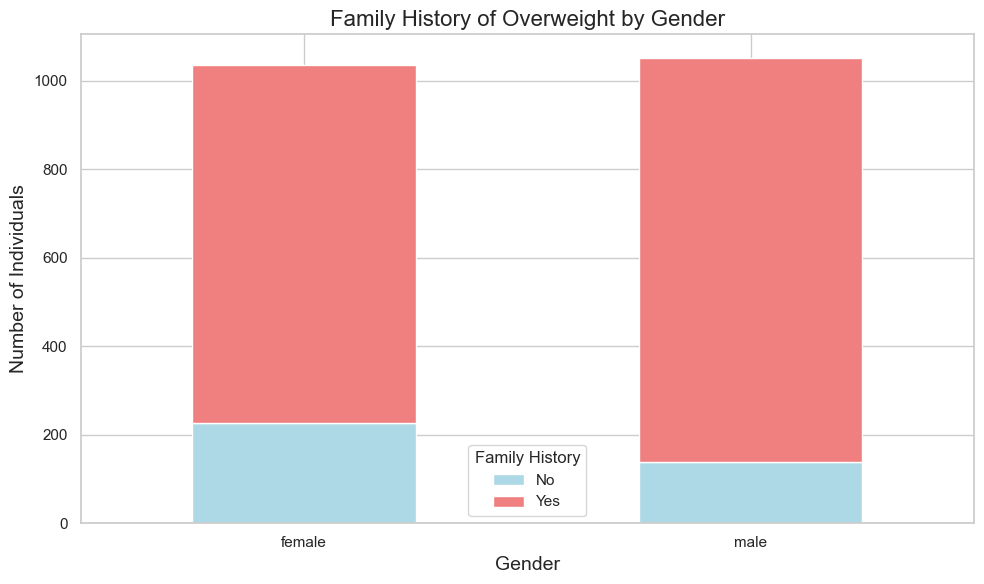

In [15]:
##family history of overweight by gender shown by stacked bar chart 

stack_data = df.groupby(['gender', 'family_history']).size().unstack()

stack_data.columns = ['No', 'Yes']

stack_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])

plt.title('Family History of Overweight by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.legend(title='Family History')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
